In [96]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

### Datetime objects in Python, Numpy and Pandas

##### Native Python dates and times

In [97]:
# Python: datetime module
from datetime import datetime


In [100]:
d = datetime(year=2022, month=4, day=12)

In [101]:
d

datetime.datetime(2022, 4, 12, 0, 0)

In [108]:
type(d.strftime('%y-hamsandwich-%B'))

str

In [107]:
type(d)

datetime.datetime

In [110]:
# Once you have a datetime object, you can do things like printing the day of the week:

#### Numpy native time series dtype

In [111]:
date = np.array('2015-07-14', dtype=np.datetime64)

In [112]:
type(date)

numpy.ndarray

In [115]:
date

array('2015-07-14', dtype='datetime64[D]')

In [117]:
np.arange(1,3, 0.25)

array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75])

In [118]:
# np.arange?

In [121]:
# mixed data types with basic datetime object can cause breakage:
# d + np.arange(1,5)

TypeError: unsupported operand type(s) for +: 'datetime.datetime' and 'int'

In [ ]:
# Now can quickly do vectorized operations on it!

In [119]:
date + np.arange(1,5)

array(['2015-07-15', '2015-07-16', '2015-07-17', '2015-07-18'],
      dtype='datetime64[D]')

##### Pandas time series data type:

- Timestamp
- 'DatetimeIndex' - Datetime object as Index

In [122]:
# layers so far:
# basic datetime object
# bulit on top of that: np.datetime64
# one more:
# pd.Timestamp()

In [124]:
t = pd.Timestamp('2021-06-30, 07:50:15')

In [126]:
t.quarter

2

In [127]:
t

Timestamp('2021-06-30 07:50:15')

In [ ]:
# We can use various attributes of datetime object to figure out day, month, year, weekday etc


In [128]:
# weekday?
t.weekday()

2

In [129]:
t.day_name()

'Wednesday'

Timestamp documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html

## Demo: Working with Timeseries data in pandas

In [132]:
# We will use Ethererum price data from 2017-2020 to demo Pandas capability for time-series data

sheet_url = 'https://docs.google.com/spreadsheets/d/1kTrAFSrr-xP3REs0Lly0TdV4ekrHahBXLg9r5qKxmV8/edit#gid=0'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

csv_export_url

'https://docs.google.com/spreadsheets/d/1kTrAFSrr-xP3REs0Lly0TdV4ekrHahBXLg9r5qKxmV8/export?format=csv&gid=0'

In [133]:
df = pd.read_csv(csv_export_url)

In [134]:
df.head()

,Date,Symbol,Close,Volume
0,2020-03-13 12-PM,ETHUSD,128.71,3906590.52
1,2020-03-13 12-AM,ETHUSD,129.94,10329663.70
2,2020-03-13 11-AM,ETHUSD,119.51,3311080.29
3,2020-03-13 10-AM,ETHUSD,124.47,3483436.48
4,2020-03-13 09-AM,ETHUSD,124.08,2767584.44


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23674 entries, 0 to 23673
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    23674 non-null  object 
 1   Symbol  23674 non-null  object 
 2   Close   23674 non-null  float64
 3   Volume  23674 non-null  float64
dtypes: float64(2), object(2)
memory usage: 739.9+ KB


In [137]:
# check for null

In [138]:
df.columns

Index(['Date', 'Symbol', 'Close', 'Volume'], dtype='object')

<AxesSubplot:>

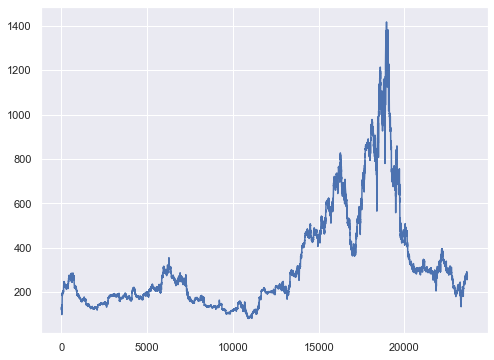

In [139]:
# use pandas .plot()

df.Close.plot()

### Time series analysis: How to make pandas time-aware and leverage inbuild functionality:

1. Convert 'date/time' column to datetime object in Pandas (pd.to_datetime())
2. Set the datetime column as Index
3. Sort the datetime index

In [141]:
# pd.to_datetime?

In [143]:
pd.to_datetime('January 1 1970')

Timestamp('1970-01-01 00:00:00')

In [149]:
# to_datetime will do a lot for you automatically, but ensure that the results are what you intend!
pd.to_datetime('01-01-70')

Timestamp('2070-01-01 00:00:00')

In [ ]:
# 2020-03-13 08-PM'
# four-digit year, followed by a hyphen, followed by a two digit month, followed by a hyphen
# followed by a two digit date, followed by a time (hour) a hyphen, and am/pm

In [ ]:
# pandas to_datetime method can convert strings/object to datetime object (aka Timestamp object).
# Most of time pandas is smart enough to parse the date without any help.



In [ ]:
# Sometimes we have to specify the format of the datatime string to help pandas parse the date/time)



In [153]:
pd.to_datetime('2020-03-13 08-PM', format='%Y-%m-%d %I-%p')

Timestamp('2020-03-13 20:00:00')

In [154]:
df.head()

,Date,Symbol,Close,Volume
0,2020-03-13 12-PM,ETHUSD,128.71,3906590.52
1,2020-03-13 12-AM,ETHUSD,129.94,10329663.70
2,2020-03-13 11-AM,ETHUSD,119.51,3311080.29
3,2020-03-13 10-AM,ETHUSD,124.47,3483436.48
4,2020-03-13 09-AM,ETHUSD,124.08,2767584.44


In [155]:
df.Date = pd.to_datetime(df.Date, format='%Y-%m-%d %I-%p')

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23674 entries, 0 to 23673
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    23674 non-null  datetime64[ns]
 1   Symbol  23674 non-null  object        
 2   Close   23674 non-null  float64       
 3   Volume  23674 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 739.9+ KB


In [156]:
df.head()

,Date,Symbol,Close,Volume
0,2020-03-13 12:00:00,ETHUSD,128.71,3906590.52
1,2020-03-13 00:00:00,ETHUSD,129.94,10329663.70
2,2020-03-13 11:00:00,ETHUSD,119.51,3311080.29
3,2020-03-13 10:00:00,ETHUSD,124.47,3483436.48
4,2020-03-13 09:00:00,ETHUSD,124.08,2767584.44


In [159]:
df = df.set_index('Date').sort_index()

In [160]:
df.head()

,Symbol,Close,Volume
Date,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87
2017-07-01 12:00:00,ETHUSD,263.12,824362.87
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55


<AxesSubplot:xlabel='Date'>

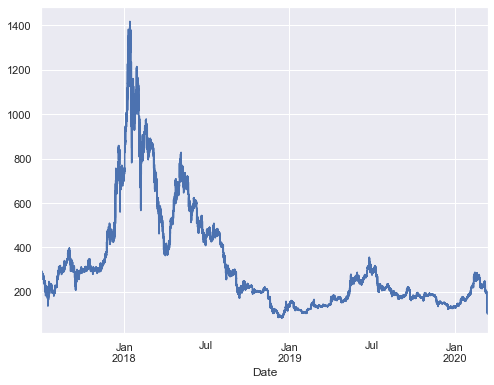

In [161]:
df.Close.plot()

Documentation on strftime() Format Codes:  
https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

#### Pandas *datetimeIndex* attributes

https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html

In [ ]:
# add a new columns called 'day' which is the 'weekday'

In [163]:
df['day'] = df.index.day_name()

In [166]:
df[['day']].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23674 entries, 2017-07-01 11:00:00 to 2020-03-13 20:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   day     23674 non-null  object
dtypes: object(1)
memory usage: 369.9+ KB


<AxesSubplot:xlabel='day'>

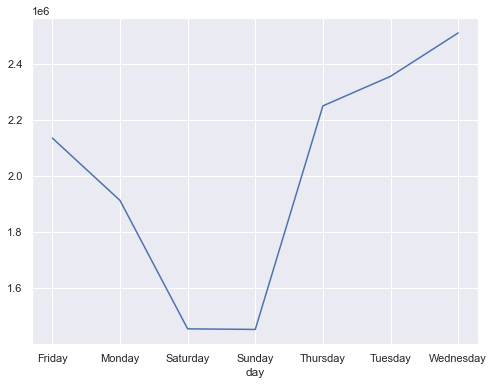

In [167]:
# Can I use groupby to see mean trading volume by day:
df.groupby('day').mean().Volume.plot()

### How to choose subset of a dataframe?

In [170]:
df.tail()

,Symbol,Close,Volume,day
Date,,,,
2020-03-13 16:00:00,ETHUSD,127.57,4461424.71,Friday
2020-03-13 17:00:00,ETHUSD,133.80,2753450.92,Friday
2020-03-13 18:00:00,ETHUSD,128.93,4898735.81,Friday
2020-03-13 19:00:00,ETHUSD,134.03,7579741.09,Friday
2020-03-13 20:00:00,ETHUSD,124.85,1940673.93,Friday


In [169]:
df.loc['2017-07-01 11:00:00']

Symbol      ETHUSD
Close       257.13
Volume   679358.87
day       Saturday
Name: 2017-07-01 11:00:00, dtype: object

In [173]:
# choose rows for '2017-07-01' (show only first 10 values)

df['2017': '2019'][:10]

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday
2017-07-01 16:00:00,ETHUSD,265.74,1287300.75,Saturday
2017-07-01 17:00:00,ETHUSD,272.57,1894983.33,Saturday
2017-07-01 18:00:00,ETHUSD,268.00,5396852.35,Saturday
2017-07-01 19:00:00,ETHUSD,263.51,3962669.00,Saturday


,Symbol,Close,Volume,day
Date,,,,
2019-12-31 19:00:00,ETHUSD,131.10,1169847.84,Tuesday
2019-12-31 20:00:00,ETHUSD,129.29,428183.38,Tuesday
2019-12-31 21:00:00,ETHUSD,128.83,350155.69,Tuesday
2019-12-31 22:00:00,ETHUSD,127.84,554646.02,Tuesday
2019-12-31 23:00:00,ETHUSD,128.38,440678.91,Tuesday


In [174]:
# we can also use date range

df['2018-01-01': '2018-06-30']

,Symbol,Close,Volume,day
Date,,,,
2018-01-01 00:00:00,ETHUSD,754.42,2697546.48,Monday
2018-01-01 01:00:00,ETHUSD,734.59,1886624.01,Monday
2018-01-01 02:00:00,ETHUSD,730.01,2950627.37,Monday
2018-01-01 03:00:00,ETHUSD,747.90,3461348.11,Monday
2018-01-01 04:00:00,ETHUSD,757.86,3180304.69,Monday
...,...,...,...,...
2018-06-30 19:00:00,ETHUSD,454.25,715461.94,Saturday
2018-06-30 20:00:00,ETHUSD,447.32,889070.47,Saturday
2018-06-30 21:00:00,ETHUSD,444.99,378183.34,Saturday


### Changing the Period

- Upsampling - increasing frequency
    - This will result in empty observations which you may choose to fill with .ffill(),  .bfill(), or some other method.

- Downsampling - reducing frequency

In [175]:
url = "https://gist.githubusercontent.com/ryanorsinger/b309f8db19e0ca71b213d4877d835e77/raw/f5841017310e2f4ca070b313529ceec2375336ba/coffee_consumption.csv"
coffee_df = pd.read_csv(url)

In [177]:
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                261 non-null    object 
 1   coffee_consumption  261 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.2+ KB


In [178]:
coffee_df.head()


,date,coffee_consumption
0,2019-01-01,14.30
1,2019-01-02,12.91
2,2019-01-03,10.05
3,2019-01-04,6.35
4,2019-01-07,8.55


In [179]:
# change this to have a datetime index

In [180]:
coffee_df['date'] = pd.to_datetime(coffee_df.date)

In [184]:
coffee_df['weekday'] = coffee_df.date.dt.day_name()

In [185]:
coffee_df['month'] = coffee_df.date.dt.month

In [186]:
coffee_df.head()

,date,coffee_consumption,weekday,month
0,2019-01-01,14.30,Tuesday,1
1,2019-01-02,12.91,Wednesday,1
2,2019-01-03,10.05,Thursday,1
3,2019-01-04,6.35,Friday,1
4,2019-01-07,8.55,Monday,1


In [198]:
coffee_df.head()

,coffee_consumption,weekday,month
date,,,
2019-01-01,14.30,Tuesday,1
2019-01-02,12.91,Wednesday,1
2019-01-03,10.05,Thursday,1
2019-01-04,6.35,Friday,1
2019-01-07,8.55,Monday,1


In [197]:
# set our index to a datetime in order to do upsampling/downsampling
coffee_df = coffee_df.set_index('date').sort_index()

In [221]:
# note that for operations like asfreq and resample, ensuring that you have a datetime index is 
# fundamental to how the method operates:
# When performed on a regular numerical index, it will interpret values as seconds from the epoch

In [208]:
by_year = coffee_df.asfreq('Y')
by_year

,coffee_consumption,weekday,month
date,,,
2019-12-31,10.17,Tuesday,12


In [206]:
by_hour = coffee_df.asfreq('H')

In [207]:
by_hour

,coffee_consumption,weekday,month
date,,,
2019-01-01 00:00:00,14.30,Tuesday,1.00
2019-01-01 01:00:00,NaN,NaN,NaN
2019-01-01 02:00:00,NaN,NaN,NaN
2019-01-01 03:00:00,NaN,NaN,NaN
2019-01-01 04:00:00,NaN,NaN,NaN
...,...,...,...
2019-12-30 20:00:00,NaN,NaN,NaN
2019-12-30 21:00:00,NaN,NaN,NaN
2019-12-30 22:00:00,NaN,NaN,NaN


In [201]:
by_day.head(10)

,coffee_consumption,weekday,month
date,,,
2019-01-01,14.30,Tuesday,1.00
2019-01-02,12.91,Wednesday,1.00
2019-01-03,10.05,Thursday,1.00
2019-01-04,6.35,Friday,1.00
2019-01-05,NaN,NaN,NaN
2019-01-06,NaN,NaN,NaN
2019-01-07,8.55,Monday,1.00
2019-01-08,9.41,Tuesday,1.00
2019-01-09,7.22,Wednesday,1.00


In [203]:
# let's assign a couple columns to highlight how backfill and front-filling operates
# .ffill will pad null values with the last available value
# .bill will pad null values with next available value
# lambda: for the dataframe, take the coffee_consumption column from said dataframe and {f/b}fill
by_day.assign(
    ffil=lambda coffee_df: coffee_df.coffee_consumption.ffill(),
    bfill=lambda coffee_df: coffee_df.coffee_consumption.bfill()).head(10)

,coffee_consumption,weekday,month,ffil,bfill
date,,,,,
2019-01-01,14.30,Tuesday,1.00,14.30,14.30
2019-01-02,12.91,Wednesday,1.00,12.91,12.91
2019-01-03,10.05,Thursday,1.00,10.05,10.05
2019-01-04,6.35,Friday,1.00,6.35,6.35
2019-01-05,NaN,NaN,NaN,6.35,8.55
2019-01-06,NaN,NaN,NaN,6.35,8.55
2019-01-07,8.55,Monday,1.00,8.55,8.55
2019-01-08,9.41,Tuesday,1.00,9.41,9.41
2019-01-09,7.22,Wednesday,1.00,7.22,7.22


In [204]:
# we will presume that the missing values are not to be appropriately reflected by 
# the previous or next value, because we will surmise that the missing values are 
# weekends, where no one is in this office

In [210]:
by_day.head()

,coffee_consumption,weekday,month
date,,,
2019-01-01,14.30,Tuesday,1.00
2019-01-02,12.91,Wednesday,1.00
2019-01-03,10.05,Thursday,1.00
2019-01-04,6.35,Friday,1.00
2019-01-05,NaN,NaN,NaN


In [212]:
by_day['month'] = by_day.index.month

In [214]:
by_day['weekday'] = by_day.index.day

In [216]:
by_day.fillna(0)

,coffee_consumption,weekday,month
date,,,
2019-01-01,14.30,1,1
2019-01-02,12.91,2,1
2019-01-03,10.05,3,1
2019-01-04,6.35,4,1
2019-01-05,0.00,5,1
...,...,...,...
2019-12-27,9.46,27,12
2019-12-28,0.00,28,12
2019-12-29,0.00,29,12


#### What did we do our dataframe (size?)



#### Code Description   	
D	Calendar day	       
W	Weekly		  
M	Month end	          
Q	Quarter end            
A	Year end	         
H	Hours	              
T	Minutes		
S	Seconds		
L	Milliseonds		
U	Microseconds		
N	nanoseconds		
   


#### What does the code above do to your dataframe content and size?

### Resampling 

- Fundamentally data aggregation (similar to groupby but for dates)
    - as opposed to afreq which is more of a 'data selection'
- Only works on dataframes with a datetime index


In [222]:
# let's revisit the etherium dataset

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23674 entries, 2017-07-01 11:00:00 to 2020-03-13 20:00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Symbol  23674 non-null  object 
 1   Close   23674 non-null  float64
 2   Volume  23674 non-null  float64
 3   day     23674 non-null  object 
dtypes: float64(2), object(2)
memory usage: 1.4+ MB


In [225]:
df.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23674 entries, 0 to 23673
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    23674 non-null  datetime64[ns]
 1   Symbol  23674 non-null  object        
 2   Close   23674 non-null  float64       
 3   Volume  23674 non-null  float64       
 4   day     23674 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 924.9+ KB


In [227]:
df.head()

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday


In [230]:
df.Symbol.value_counts()

ETHUSD    23674
Name: Symbol, dtype: int64

In [235]:
# resample the whole dataframe every hour using mean as an aggregator
# resampling is allowing us to aggregate on a bigger value of date than our base 
# level of granularity
# think of it as a groupby but for time

df.resample('D').mean()

,Close,Volume
Date,,
2017-07-01,265.28,2198771.14
2017-07-02,269.78,2177595.32
2017-07-03,278.88,1459014.73
2017-07-04,276.74,1254579.39
2017-07-05,265.03,1797923.44
...,...,...
2020-03-09,200.82,3804751.53
2020-03-10,201.58,1553063.15
2020-03-11,195.91,1894867.73


In [236]:
# resample monthly and use mean for aggregation

df.resample('M').mean().head()

,Close,Volume
Date,,
2017-07-31,220.01,2480603.27
2017-08-31,298.51,2056355.72
2017-09-30,298.52,2331871.43
2017-10-31,305.65,1096152.84
2017-11-30,355.65,2741743.75


In [237]:
# resample yearly
df.resample('Y').mean().head()

,Close,Volume
Date,,
2017-12-31,351.97,2948844.73
2018-12-31,480.93,2733347.11
2019-12-31,180.75,936000.88
2020-12-31,197.57,1415723.35


<AxesSubplot:xlabel='Date'>

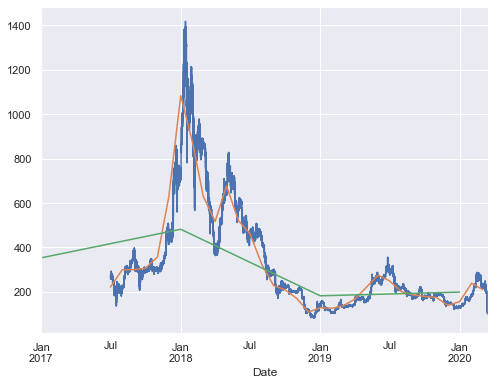

In [241]:
# Plot raw data with monthly resampled data

df.Close.plot(label='Original Granularity')
df.resample('M').mean().Close.plot(label='Monthly resample')
df.resample('Y').mean().Close.plot(label='Yearly resample')

### Rolling Averages/Windows

- Rolling average aka. moving averages, are generally used to smooth out short-term fluctuations in time series data and highlight long-term trends

In [244]:
df.rolling(10).mean().head(11)

,Close,Volume
Date,,
2017-07-01 11:00:00,NaN,NaN
2017-07-01 12:00:00,NaN,NaN
2017-07-01 13:00:00,NaN,NaN
2017-07-01 14:00:00,NaN,NaN
2017-07-01 15:00:00,NaN,NaN
2017-07-01 16:00:00,NaN,NaN
2017-07-01 17:00:00,NaN,NaN
2017-07-01 18:00:00,NaN,NaN
2017-07-01 19:00:00,NaN,NaN


In [245]:
# What is the rolling average of 4 hours?

df.rolling(4).mean().head(6)

,Close,Volume
Date,,
2017-07-01 11:00:00,NaN,NaN
2017-07-01 12:00:00,NaN,NaN
2017-07-01 13:00:00,NaN,NaN
2017-07-01 14:00:00,267.52,1554261.65
2017-07-01 15:00:00,270.44,1759492.57
2017-07-01 16:00:00,271.09,1875227.04


In [247]:
type(df.resample('W').mean())

pandas.core.frame.DataFrame

In [248]:
# Resampling and rolling average together

df.resample('W').mean().rolling(4).mean()

,Close,Volume
Date,,
2017-07-02,NaN,NaN
2017-07-09,NaN,NaN
2017-07-16,NaN,NaN
2017-07-23,234.44,2701933.39
2017-07-30,218.21,2551106.81
...,...,...
2020-02-16,201.10,1132458.35
2020-02-23,226.48,1488246.45
2020-03-01,241.13,1866718.23


In [250]:
df.Close.mean()

324.9266013347982

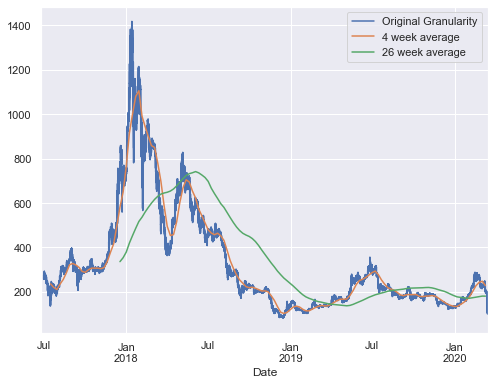

In [249]:
df.Close.plot(label='Original Granularity')
df.resample('W').mean().Close.rolling(4).mean().plot(label='4 week average')
df.resample('W').mean().Close.rolling(26).mean().plot(label='26 week average')
plt.legend()
plt.show()

In [ ]:
# Min/max or any other aggregation


### Lagging and Lead

- Shift: move the data backwards and forwards by a given amount
- diff: find the difference with the previous observation (or a specified further back observation)
- Can be used to computing differences over time

In [251]:
# Use 'shift' to move the timeseries into the future

df_daily = df.resample('D').mean()
df_daily.head(10)

In [252]:
df_daily['shift_by_one'] = df_daily.Close.shift(1)

In [253]:
df_daily.head(5)

,Close,Volume,shift_by_one
Date,,,
2017-07-01,265.28,2198771.14,NaN
2017-07-02,269.78,2177595.32,265.28
2017-07-03,278.88,1459014.73,269.78
2017-07-04,276.74,1254579.39,278.88
2017-07-05,265.03,1797923.44,276.74


In [254]:
# create a new column 'diff(1)'
df_daily['diff(1)'] = df_daily.Close.diff(1)

In [256]:
269.78 - 265.28

4.5

In [259]:
df_daily['other_diff'] = df_daily.Close - df_daily['shift_by_one']

In [260]:
df_daily.head(10)

,Close,Volume,shift_by_one,diff(1),other_diff
Date,,,,,
2017-07-01,265.28,2198771.14,NaN,NaN,NaN
2017-07-02,269.78,2177595.32,265.28,4.50,4.50
2017-07-03,278.88,1459014.73,269.78,9.10,9.10
2017-07-04,276.74,1254579.39,278.88,-2.14,-2.14
2017-07-05,265.03,1797923.44,276.74,-11.72,-11.72
2017-07-06,266.48,962700.63,265.03,1.45,1.45
2017-07-07,253.94,1801485.06,266.48,-12.54,-12.54
2017-07-08,241.55,1356294.00,253.94,-12.39,-12.39
2017-07-09,244.81,729444.92,241.55,3.27,3.27


In [ ]:
plt.plot(df.Close)

In [261]:
# posit: where we were a year ago: 200
# posit: where we are today: 100

2.0

In [ ]:
# how would I calculate yearly rate of return?
# proportion: where we were a year ago / where we are today 

(17348.0, 18048.0)

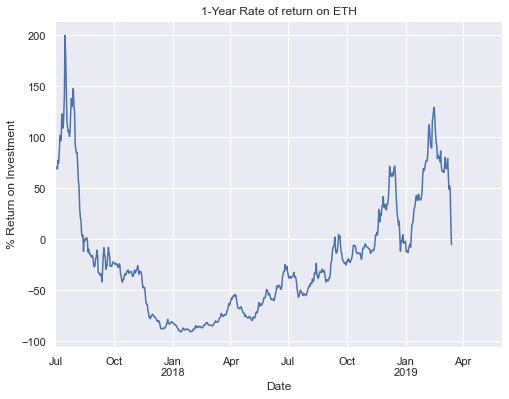

In [287]:
# Use for shift/diff to calculate 1 year rate of return
((df_daily.Close.shift(-365)/df_daily.Close -1) *100).plot()
plt.ylabel('% Return on Investment')
plt.title('1-Year Rate of return on ETH')
plt.xlim(pd.Timestamp('2017-07'), pd.Timestamp('2019-06'))

### Time Zone

In [275]:
# datetime with no timezone specified (sometimes called timezone naive datetime object)
t = pd.Timestamp('2020-04-14 10:25:25')

In [266]:
t

Timestamp('2020-04-14 10:25:25')

In [267]:
#specify timezone
t1 = pd.Timestamp('2020-04-14 10:25:25', tz='Us/Central')


In [268]:
t

Timestamp('2020-04-14 10:25:25-0500', tz='US/Central')

In [269]:
# convert to a different timezone

t1 = t.tz_convert(tz='Asia/tokyo')

In [270]:
t1

Timestamp('2020-04-15 00:25:25+0900', tz='Asia/Tokyo')

In [274]:
# What is date and time right now? Take any datetime object and use .now() method
# just like we saw in sql, we can pull a now() function
pd.Timestamp.now()

Timestamp('2022-04-12 15:49:32.694089')

### Timedelta

In [277]:
t

Timestamp('2020-04-14 10:25:25')

In [282]:
# time delta between now (today's date) and t1

(pd.Timestamp.now() - t) // pd.Timedelta('1d')

728

In [285]:
# To convert the above Timedelta object to a number:

type((pd.Timestamp.now() - t) // pd.Timedelta('1d'))

int